# Distribución de Bernoulli
La probabilidad estimada de los datos

## Importamos librerías a utilizar
numpy, pyplot de matplotlib, Counter de collections

In [108]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

## Cargamos datos

In [109]:
moneda_1 = np.load('data/coin_1.npy')
moneda_2 = np.load('data/coin_2.npy')
moneda_3 = np.load('data/coin_3.npy')

## Frecuencia de los datos

In [110]:
moneda_1_frecuencia = Counter(moneda_1)

In [111]:
print(moneda_1_frecuencia)

Counter({'cara': 514, 'seca': 486})


In [112]:
moneda_1_frecuencia.values()

dict_values([486, 514])

In [113]:
moneda_1_frecuencia.keys()

dict_keys(['seca', 'cara'])

## Histograma

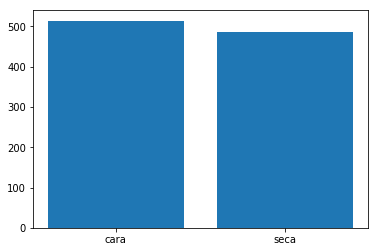

In [114]:
plt.bar(moneda_1_frecuencia.keys(), moneda_1_frecuencia.values())
plt.show()

## Histograma normalizado 
Estimación de la función de masa de probabilidad

In [115]:
print(moneda_1_frecuencia.values())
print(list(moneda_1_frecuencia.values()))
print(np.array(list(moneda_1_frecuencia.values())))

dict_values([486, 514])
[486, 514]
[486 514]


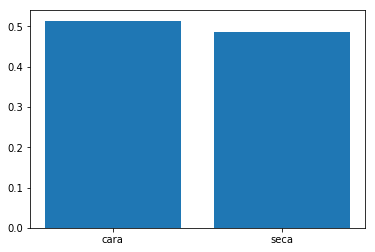

In [116]:
moneda_1_frecuencia_array = np.array(list(moneda_1_frecuencia.values()))
plt.bar(['seca', 'cara'], moneda_1_frecuencia_array/len(moneda_1))
plt.show()

## Resumimos todo en un método
Y lo guardamos en una librería

In [135]:
def plot_normalized_histogram(data):
    frecuencia = Counter(data)
    espacio_muestral = frecuencia.keys()
    probabilidades_ = np.array(list(frecuencia.values()))/len(data)
    plt.bar(espacio_muestral, probabilidades_)
    plt.show()
    return list(espacio_muestral), probabilidades_

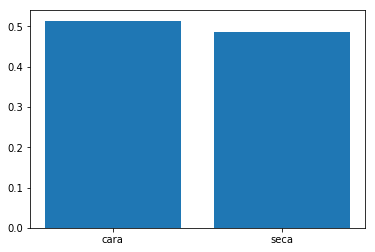

(['seca', 'cara'], array([ 0.486,  0.514]))

In [136]:
plot_normalized_histogram(moneda_1)

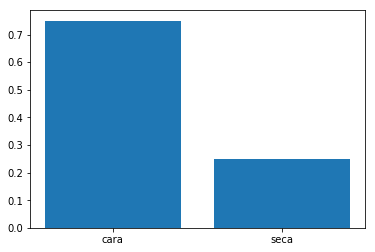

(dict_keys(['seca', 'cara']), array([ 0.25,  0.75]))

In [119]:
plot_normalized_histogram(moneda_2)

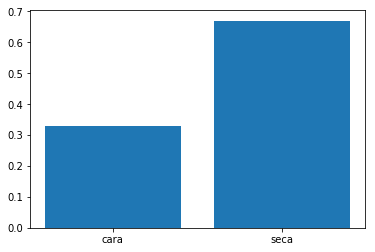

(dict_keys(['seca', 'cara']), array([ 0.67,  0.33]))

In [120]:
plot_normalized_histogram(moneda_3)

## Variable Aleatoria
Mapeo de las posibles salidas de un experimento al eje real

In [129]:
moneda_2_bernoulli = np.zeros(len(moneda_2))

In [130]:
moneda_2_bernoulli[moneda_2 == 'cara'] = 1

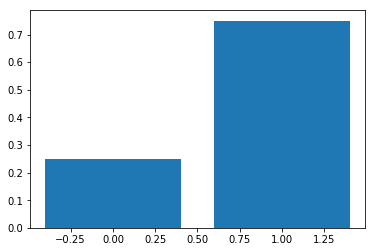

(dict_keys([0.0, 1.0]), array([ 0.25,  0.75]))

In [131]:
plot_normalized_histogram(moneda_2_bernoulli)

En este caso la V.A $X$ puede tomar 1 o 0, cara o seca respectivamente.

*Nota*: Escribiremos las V.A con mayúscula

## Distribución de Bernoulli
- Su espacio muestral es binario. (Toma solo dos estados posibles)
- Normalmente 1 o 0 (a veces 1 y -1)
- Parámetro a estimar $p$: La probabilidad de que el resultado del experimento sea 1

Escrito formalmente:

$P(X = 1) = p$  
$P(X = 0) = 1-p$

# Modelo machine learning

![modelo_machine_learning.png](modelo_machine_learning.png)

### Datos:
Pensamos los datos como variables aleatorias

$X_1$: V.A. que describe distribución de datos de moneda 1

$X_2$: V.A. que describe distribución de datos de moneda 2

$X_3$: V.A. que describe distribución de datos de moneda 3

### Modelo: 
(Que tipo de V.A)

Cada moneda es una variable aleatoria $X_i$ con distribución de **Bernoulli**  y paramtro $p$

### Inferencia (Estimación de parámetros): 
\begin{equation}
\large
p = \frac{N_{caras}}{N}
\end{equation}

$P(X_1 = 1) = p = 0.514$  
$P(X_2 = 1) = p = 0.75$  
$P(X_3 = 1) = p = 0.33$  

### Que podemos hacer?
- Generar mas datos con cualquiera de los modelos de monedas

In [133]:
p = 0.75
np.random.choice([0, 1],  size = 100, p = [1-p, p])

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1])

- Dados mas tiradas de alguna de las monedas determinar de cual de las monedas es mas probable que provengan estos datos.